<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

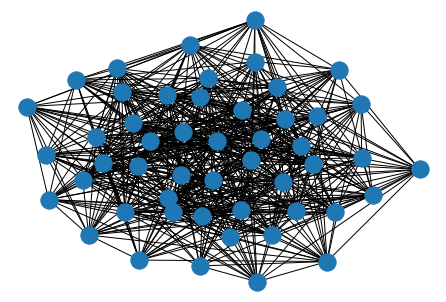

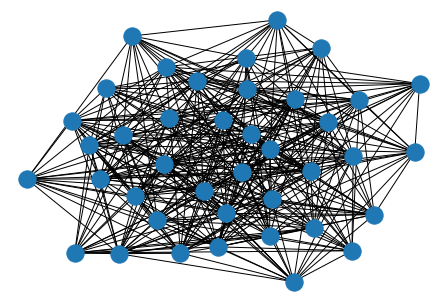

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 50 nodes contact network of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .5 #Probabibilty for Node Connection in random graph
PP = .5
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


# some network properties
#print("the adjacency list")
#for line in nx.generate_adjlist(Graph):
#    print(line)

nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
#!jupyter notebook --generate-config

In [3]:
#%%writefile /root/.jupyter/jupyter_notebook_config.py
#NotebookApp.iopub_data_rate_limit =
#NotebookApp.rate_limit_window =

In [4]:
#%pycat /root/.jupyter/jupyter_notebook_config.py

In [5]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 1 0 ... 1 1 0]
 [1 0 0 ... 1 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [1 1 0 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 [0 0 0 ... 1 1 0]]
[[0 0 0 ... 1 0 1]
 [0 0 1 ... 1 1 0]
 [0 1 0 ... 1 0 0]
 ...
 [1 1 1 ... 0 1 1]
 [0 1 0 ... 1 0 1]
 [1 0 0 ... 1 1 0]]


In [6]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [7]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [8]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  #Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
  #Agent[k].append({'State' : Rand_state})
  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [9]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [10]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load'])/2})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  #if Agent_next[a_id][1]['Home_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  #if Agent_next[a_id][3]['First_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent[a_id][3]['First_node'])
                  #if Agent_next[a_id][5]['Second_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']) :
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:
                      if len(neighbors) == 3:
                        next = random.choices(neighbors,weights=(95,2.5,2.5), k=1)[0]
                      elif len(neighbors) == 2:
                        next = random.choices(neighbors,weights=(95,5), k=1)[0]
                      else:
                        next = random.choices(neighbors,weights=(100), k=1)[0]
                      #next = random.choice(neighbors)
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                       
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(90,10,10),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            #if nex != cur:
              #Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          #print(Agent[a_id])
          #print(curr_walk)
          walks.append(nex)
    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] < .01:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home)  
    return Node,Node_next,Agent,Agent_next

In [11]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
  return count_S,count_I,count_R

In [12]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9797, 9592, 9243, 8763, 8080, 7113, 5913, 4501, 3154, 1918, 1022, 485, 220, 89, 47, 28, 19, 15, 13, 12, 11, 11, 11, 11, 11, 11, 11, 11]
[203, 408, 757, 1237, 1920, 2887, 4087, 5296, 6438, 7325, 7741, 7595, 6893, 5824, 4454, 3126, 1899, 1007, 472, 208, 78, 36, 17, 8, 4, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 408, 757, 1237, 1920, 2887, 4087, 5499, 6846, 8082, 8978, 9515, 9780, 9911, 9953, 9972, 9981, 9985, 9987, 9988, 9989]


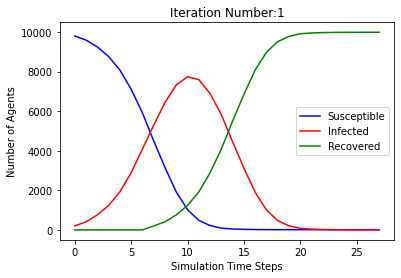

[9797, 9618, 9341, 8885, 8245, 7406, 6271, 4843, 3396, 2105, 1094, 503, 210, 99, 65, 41, 24, 20, 17, 15, 14, 14, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12]
[203, 382, 659, 1115, 1755, 2594, 3729, 4954, 6222, 7236, 7791, 7742, 7196, 6172, 4778, 3355, 2081, 1074, 486, 195, 85, 51, 28, 11, 8, 5, 3, 2, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 382, 659, 1115, 1755, 2594, 3729, 5157, 6604, 7895, 8906, 9497, 9790, 9901, 9935, 9959, 9976, 9980, 9983, 9985, 9986, 9986, 9987, 9987, 9988]


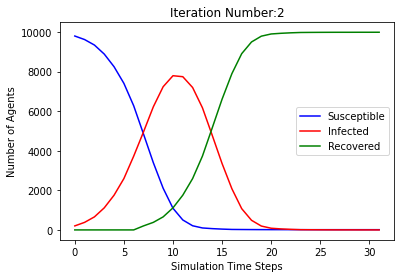

[9797, 9611, 9295, 8807, 8102, 7207, 5963, 4592, 3230, 1968, 1052, 497, 214, 91, 35, 18, 13, 11, 9, 7, 7, 7, 7, 7, 7, 7, 7]
[203, 389, 705, 1193, 1898, 2793, 4037, 5205, 6381, 7327, 7755, 7605, 6993, 5872, 4557, 3212, 1955, 1041, 488, 207, 84, 28, 11, 6, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 389, 705, 1193, 1898, 2793, 4037, 5408, 6770, 8032, 8948, 9503, 9786, 9909, 9965, 9982, 9987, 9989, 9991, 9993]


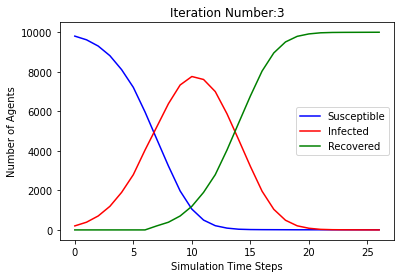

[9797, 9596, 9273, 8771, 8063, 7082, 5878, 4472, 3049, 1796, 919, 441, 204, 86, 34, 18, 14, 9, 8, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5]
[203, 404, 727, 1229, 1937, 2918, 4122, 5325, 6547, 7477, 7852, 7622, 6878, 5792, 4438, 3031, 1782, 910, 433, 198, 80, 29, 13, 9, 4, 3, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 404, 727, 1229, 1937, 2918, 4122, 5528, 6951, 8204, 9081, 9559, 9796, 9914, 9966, 9982, 9986, 9991, 9992, 9994, 9994, 9995]


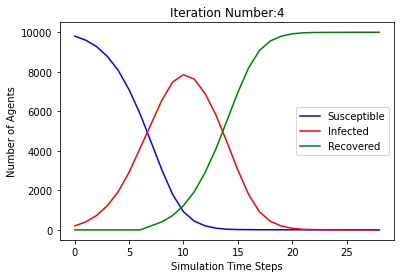

[9797, 9602, 9272, 8778, 8087, 7178, 5961, 4574, 3125, 1832, 922, 438, 198, 90, 43, 26, 13, 9, 8, 8, 8, 8, 8, 8, 8, 8]
[203, 398, 728, 1222, 1913, 2822, 4039, 5223, 6477, 7440, 7856, 7649, 6980, 5871, 4531, 3099, 1819, 913, 430, 190, 82, 35, 18, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 398, 728, 1222, 1913, 2822, 4039, 5426, 6875, 8168, 9078, 9562, 9802, 9910, 9957, 9974, 9987, 9991, 9992]


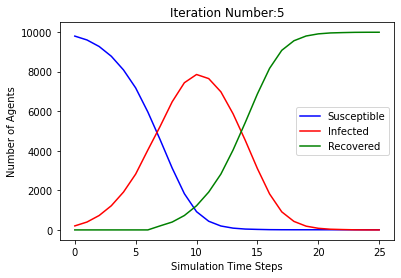

[9797, 9585, 9230, 8745, 8070, 7126, 5923, 4489, 3073, 1769, 875, 399, 149, 59, 30, 19, 14, 14, 11, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9]
[203, 415, 770, 1255, 1930, 2874, 4077, 5308, 6512, 7461, 7870, 7671, 6977, 5864, 4459, 3054, 1755, 861, 388, 139, 49, 20, 9, 5, 5, 2, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 415, 770, 1255, 1930, 2874, 4077, 5511, 6927, 8231, 9125, 9601, 9851, 9941, 9970, 9981, 9986, 9986, 9989, 9990, 9990, 9990, 9990, 9991]


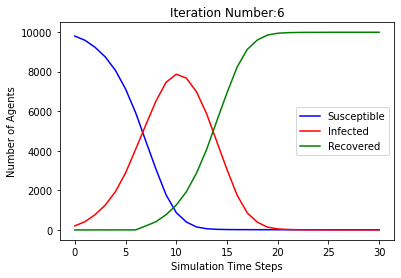

[9797, 9617, 9303, 8846, 8166, 7226, 6016, 4595, 3102, 1833, 882, 383, 168, 80, 43, 30, 20, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17]
[203, 383, 697, 1154, 1834, 2774, 3984, 5202, 6515, 7470, 7964, 7783, 7058, 5936, 4552, 3072, 1813, 864, 365, 150, 63, 26, 13, 3, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 383, 697, 1154, 1834, 2774, 3984, 5405, 6898, 8167, 9118, 9617, 9832, 9920, 9957, 9970, 9980, 9982, 9982, 9982, 9983]


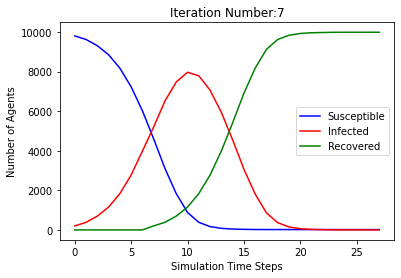

[9797, 9596, 9279, 8823, 8157, 7264, 6173, 4867, 3506, 2217, 1262, 631, 299, 125, 53, 24, 14, 10, 7, 6, 6, 6, 6, 6, 6, 6, 6]
[203, 404, 721, 1177, 1843, 2736, 3827, 4930, 6090, 7062, 7561, 7526, 6965, 6048, 4814, 3482, 2203, 1252, 624, 293, 119, 47, 18, 8, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 404, 721, 1177, 1843, 2736, 3827, 5133, 6494, 7783, 8738, 9369, 9701, 9875, 9947, 9976, 9986, 9990, 9993, 9994]


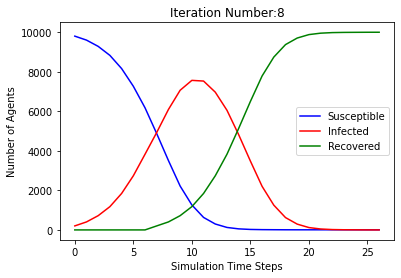

[9797, 9588, 9272, 8770, 8112, 7246, 6077, 4624, 3212, 1921, 1041, 487, 209, 96, 50, 30, 20, 11, 6, 5, 5, 5, 5, 5, 5, 5, 5]
[203, 412, 728, 1230, 1888, 2754, 3923, 5173, 6376, 7351, 7729, 7625, 7037, 5981, 4574, 3182, 1901, 1030, 481, 204, 91, 45, 25, 15, 6, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 412, 728, 1230, 1888, 2754, 3923, 5376, 6788, 8079, 8959, 9513, 9791, 9904, 9950, 9970, 9980, 9989, 9994, 9995]


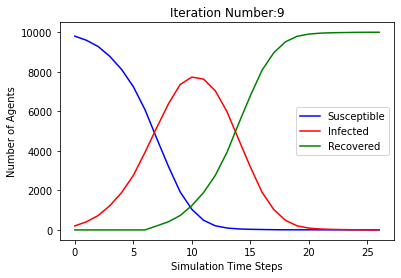

[9797, 9589, 9276, 8809, 8140, 7229, 6012, 4654, 3209, 1954, 1079, 530, 239, 108, 69, 41, 33, 25, 23, 20, 18, 17, 16, 16, 16, 16, 16, 16, 16, 16]
[203, 411, 724, 1191, 1860, 2771, 3988, 5143, 6380, 7322, 7730, 7610, 6990, 5904, 4585, 3168, 1921, 1054, 507, 219, 90, 52, 25, 17, 9, 7, 4, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 411, 724, 1191, 1860, 2771, 3988, 5346, 6791, 8046, 8921, 9470, 9761, 9892, 9931, 9959, 9967, 9975, 9977, 9980, 9982, 9983, 9984]


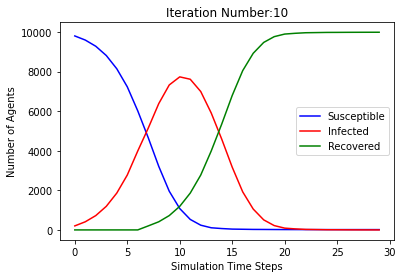

[9797, 9594, 9250, 8749, 8027, 7082, 5834, 4349, 2935, 1726, 914, 414, 171, 65, 30, 18, 14, 10, 9, 8, 7, 6, 6, 6, 6, 6, 6, 6, 6]
[203, 406, 750, 1251, 1973, 2918, 4166, 5448, 6659, 7524, 7835, 7613, 6911, 5769, 4319, 2917, 1712, 904, 405, 163, 58, 24, 12, 8, 4, 3, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 406, 750, 1251, 1973, 2918, 4166, 5651, 7065, 8274, 9086, 9586, 9829, 9935, 9970, 9982, 9986, 9990, 9991, 9992, 9993, 9994]


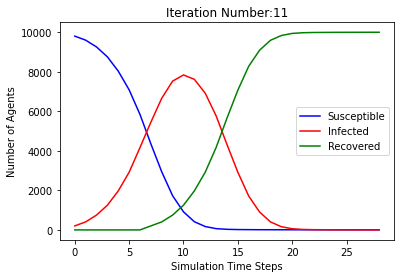

[9797, 9617, 9305, 8868, 8211, 7347, 6196, 4767, 3287, 2042, 1083, 494, 198, 84, 41, 22, 15, 11, 10, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8]
[203, 383, 695, 1132, 1789, 2653, 3804, 5030, 6330, 7263, 7785, 7717, 7149, 6112, 4726, 3265, 2027, 1072, 484, 189, 75, 32, 13, 7, 3, 2, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 383, 695, 1132, 1789, 2653, 3804, 5233, 6713, 7958, 8917, 9506, 9802, 9916, 9959, 9978, 9985, 9989, 9990, 9991, 9991, 9991, 9991, 9992]


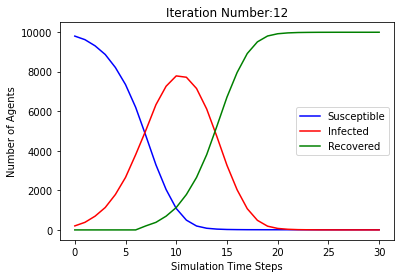

[9797, 9607, 9277, 8792, 8066, 7155, 5964, 4605, 3182, 1960, 1069, 537, 211, 82, 38, 18, 10, 6, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4]
[203, 393, 723, 1208, 1934, 2845, 4036, 5192, 6425, 7317, 7723, 7529, 6944, 5882, 4567, 3164, 1950, 1063, 532, 206, 78, 34, 14, 6, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 393, 723, 1208, 1934, 2845, 4036, 5395, 6818, 8040, 8931, 9463, 9789, 9918, 9962, 9982, 9990, 9994, 9995, 9995, 9996]


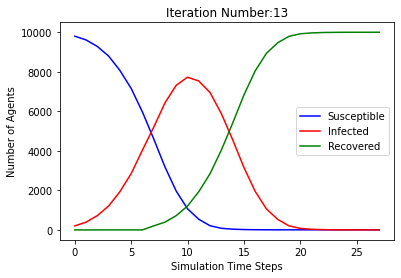

[9797, 9596, 9272, 8794, 8095, 7162, 5976, 4559, 3140, 1847, 1003, 457, 184, 71, 30, 13, 8, 7, 6, 6, 6, 6, 6, 6, 6, 6]
[203, 404, 728, 1206, 1905, 2838, 4024, 5238, 6456, 7425, 7791, 7638, 6978, 5905, 4529, 3127, 1839, 996, 451, 178, 65, 24, 7, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 404, 728, 1206, 1905, 2838, 4024, 5441, 6860, 8153, 8997, 9543, 9816, 9929, 9970, 9987, 9992, 9993, 9994]


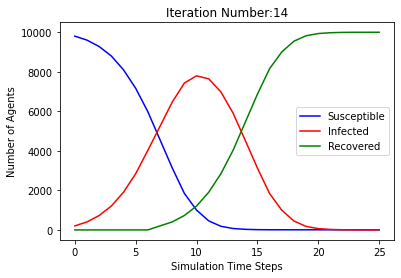

[9797, 9571, 9225, 8761, 8115, 7229, 6028, 4632, 3196, 1925, 1045, 497, 221, 93, 48, 23, 11, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7]
[203, 429, 775, 1239, 1885, 2771, 3972, 5165, 6375, 7300, 7716, 7618, 7008, 5935, 4584, 3173, 1914, 1037, 489, 213, 86, 41, 16, 4, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 429, 775, 1239, 1885, 2771, 3972, 5368, 6804, 8075, 8955, 9503, 9779, 9907, 9952, 9977, 9989, 9992, 9992, 9992, 9993]


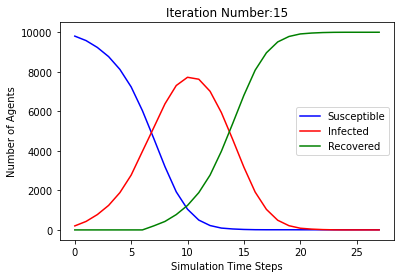

[9797, 9608, 9294, 8851, 8162, 7230, 6023, 4636, 3181, 1931, 995, 450, 192, 78, 43, 32, 25, 20, 19, 18, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16]
[203, 392, 706, 1149, 1838, 2770, 3977, 5161, 6427, 7363, 7856, 7712, 7038, 5945, 4593, 3149, 1906, 975, 431, 174, 61, 26, 16, 9, 4, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 392, 706, 1149, 1838, 2770, 3977, 5364, 6819, 8069, 9005, 9550, 9808, 9922, 9957, 9968, 9975, 9980, 9981, 9982, 9983, 9983, 9984]


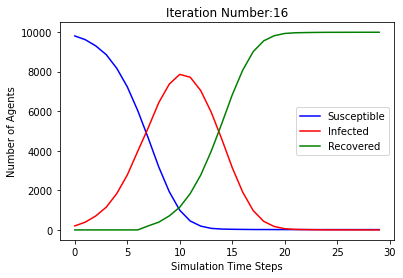

[9797, 9614, 9301, 8857, 8199, 7356, 6270, 4922, 3500, 2175, 1201, 595, 286, 126, 66, 36, 27, 23, 17, 15, 12, 11, 10, 10, 10, 10, 10, 10, 10, 10]
[203, 386, 699, 1143, 1801, 2644, 3730, 4875, 6114, 7126, 7656, 7604, 7070, 6144, 4856, 3464, 2148, 1178, 578, 271, 114, 55, 26, 17, 13, 7, 5, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 386, 699, 1143, 1801, 2644, 3730, 5078, 6500, 7825, 8799, 9405, 9714, 9874, 9934, 9964, 9973, 9977, 9983, 9985, 9988, 9989, 9990]


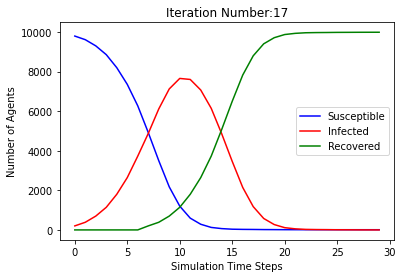

[9797, 9610, 9284, 8826, 8160, 7234, 6090, 4762, 3365, 2118, 1151, 565, 250, 111, 62, 41, 25, 18, 13, 13, 13, 13, 13, 13, 13, 13]
[203, 390, 716, 1174, 1840, 2766, 3910, 5035, 6245, 7166, 7675, 7595, 6984, 5979, 4700, 3324, 2093, 1133, 552, 237, 98, 49, 28, 12, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 390, 716, 1174, 1840, 2766, 3910, 5238, 6635, 7882, 8849, 9435, 9750, 9889, 9938, 9959, 9975, 9982, 9987]


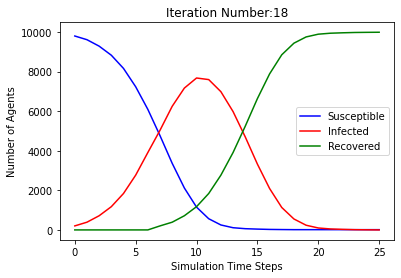

[9797, 9601, 9300, 8871, 8295, 7395, 6271, 4926, 3526, 2219, 1185, 581, 227, 110, 59, 34, 18, 11, 8, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6]
[203, 399, 700, 1129, 1705, 2605, 3729, 4871, 6075, 7081, 7686, 7714, 7168, 6161, 4867, 3492, 2201, 1174, 573, 220, 103, 52, 28, 12, 5, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 399, 700, 1129, 1705, 2605, 3729, 5074, 6474, 7781, 8815, 9419, 9773, 9890, 9941, 9966, 9982, 9989, 9992, 9993, 9993, 9993, 9994]


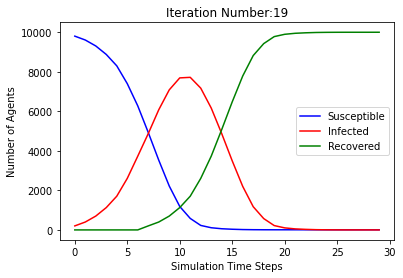

[9797, 9610, 9276, 8781, 8091, 7145, 5970, 4572, 3118, 1902, 1030, 469, 220, 109, 58, 32, 22, 17, 16, 16, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14]
[203, 390, 724, 1219, 1909, 2855, 4030, 5225, 6492, 7374, 7751, 7622, 6925, 5861, 4514, 3086, 1880, 1013, 453, 204, 94, 43, 18, 8, 3, 2, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 390, 724, 1219, 1909, 2855, 4030, 5428, 6882, 8098, 8970, 9531, 9780, 9891, 9942, 9968, 9978, 9983, 9984, 9984, 9985, 9985, 9986]


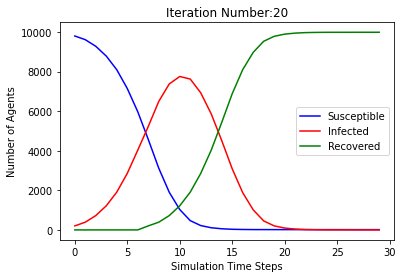

[9797, 9588, 9249, 8749, 8062, 7088, 5909, 4511, 3109, 1939, 1038, 495, 191, 88, 45, 28, 23, 18, 17, 17, 17, 17, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15]
[203, 412, 751, 1251, 1938, 2912, 4091, 5286, 6479, 7310, 7711, 7567, 6897, 5821, 4466, 3081, 1916, 1020, 478, 174, 71, 28, 12, 7, 2, 2, 2, 2, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 412, 751, 1251, 1938, 2912, 4091, 5489, 6891, 8061, 8962, 9505, 9809, 9912, 9955, 9972, 9977, 9982, 9983, 9983, 9983, 9983, 9984, 9984, 9984, 9985]


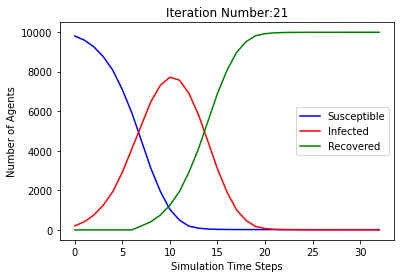

[9797, 9595, 9240, 8753, 8066, 7101, 5835, 4438, 3075, 1882, 978, 431, 163, 85, 46, 23, 16, 10, 9, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7]
[203, 405, 760, 1247, 1934, 2899, 4165, 5359, 6520, 7358, 7775, 7635, 6938, 5750, 4392, 3052, 1866, 968, 422, 155, 77, 39, 16, 9, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 405, 760, 1247, 1934, 2899, 4165, 5562, 6925, 8118, 9022, 9569, 9837, 9915, 9954, 9977, 9984, 9990, 9991, 9992, 9992, 9993]


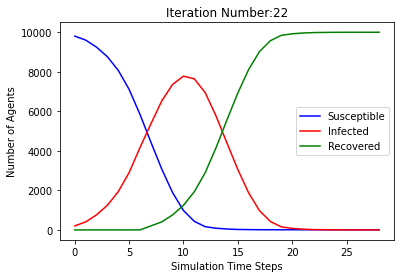

[9797, 9601, 9258, 8758, 8074, 7144, 5939, 4541, 3063, 1809, 891, 400, 159, 59, 25, 16, 13, 10, 7, 6, 6, 6, 6, 6, 6, 6, 6]
[203, 399, 742, 1242, 1926, 2856, 4061, 5256, 6538, 7449, 7867, 7674, 6985, 5880, 4516, 3047, 1796, 881, 393, 153, 53, 19, 10, 7, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 399, 742, 1242, 1926, 2856, 4061, 5459, 6937, 8191, 9109, 9600, 9841, 9941, 9975, 9984, 9987, 9990, 9993, 9994]


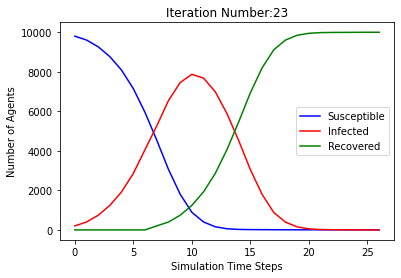

[9797, 9604, 9287, 8818, 8113, 7146, 5926, 4528, 3102, 1875, 1012, 493, 197, 69, 31, 16, 9, 8, 8, 6, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4]
[203, 396, 713, 1182, 1887, 2854, 4074, 5269, 6502, 7412, 7806, 7620, 6949, 5857, 4497, 3086, 1866, 1004, 485, 191, 64, 26, 12, 5, 4, 4, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 396, 713, 1182, 1887, 2854, 4074, 5472, 6898, 8125, 8988, 9507, 9803, 9931, 9969, 9984, 9991, 9992, 9992, 9994, 9995, 9995, 9996]


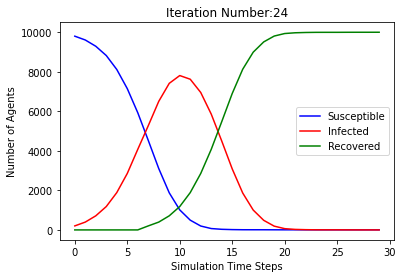

[9797, 9593, 9257, 8774, 8069, 7151, 5961, 4598, 3119, 1843, 946, 442, 222, 118, 53, 24, 14, 11, 9, 9, 8, 7, 7, 7, 7, 7, 7, 7, 7]
[203, 407, 743, 1226, 1931, 2849, 4039, 5199, 6474, 7414, 7828, 7627, 6929, 5843, 4545, 3095, 1829, 935, 433, 213, 110, 46, 17, 7, 4, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 407, 743, 1226, 1931, 2849, 4039, 5402, 6881, 8157, 9054, 9558, 9778, 9882, 9947, 9976, 9986, 9989, 9991, 9991, 9992, 9993]


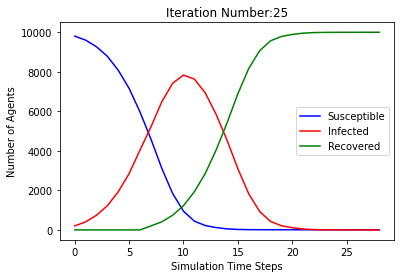

[9797, 9590, 9277, 8781, 8119, 7246, 6088, 4680, 3281, 2038, 1074, 532, 217, 87, 40, 29, 21, 14, 13, 11, 11, 11, 11, 10, 9, 9, 9, 9, 9, 9, 9, 9]
[203, 410, 723, 1219, 1881, 2754, 3912, 5117, 6309, 7239, 7707, 7587, 7029, 6001, 4640, 3252, 2017, 1060, 519, 206, 76, 29, 18, 11, 5, 4, 2, 2, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 410, 723, 1219, 1881, 2754, 3912, 5320, 6719, 7962, 8926, 9468, 9783, 9913, 9960, 9971, 9979, 9986, 9987, 9989, 9989, 9989, 9989, 9990, 9991]


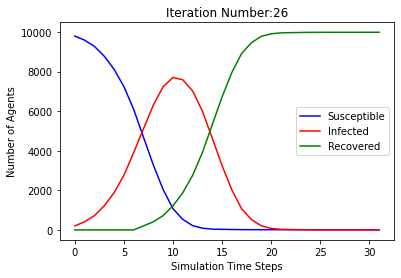

[9797, 9603, 9292, 8834, 8202, 7333, 6218, 4836, 3421, 2165, 1166, 542, 239, 103, 48, 23, 15, 10, 9, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7]
[203, 397, 708, 1166, 1798, 2667, 3782, 4961, 6182, 7127, 7668, 7660, 7094, 6115, 4788, 3398, 2150, 1156, 533, 231, 95, 41, 16, 8, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 397, 708, 1166, 1798, 2667, 3782, 5164, 6579, 7835, 8834, 9458, 9761, 9897, 9952, 9977, 9985, 9990, 9991, 9992, 9992, 9993]


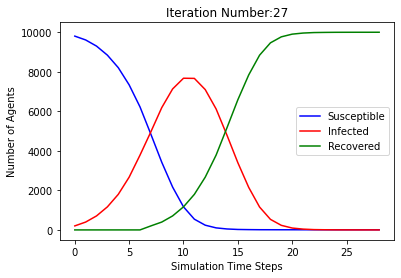

[9797, 9594, 9252, 8735, 8044, 7074, 5871, 4437, 3065, 1821, 933, 408, 180, 77, 36, 23, 17, 16, 13, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11]
[203, 406, 748, 1265, 1956, 2926, 4129, 5360, 6529, 7431, 7802, 7636, 6894, 5794, 4401, 3042, 1804, 917, 395, 168, 65, 25, 12, 6, 5, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 406, 748, 1265, 1956, 2926, 4129, 5563, 6935, 8179, 9067, 9592, 9820, 9923, 9964, 9977, 9983, 9984, 9987, 9988, 9988, 9989]


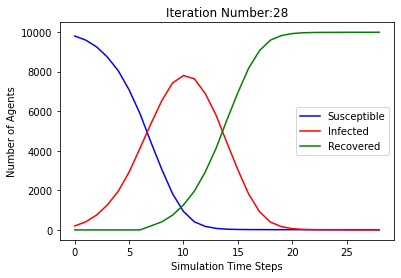

[9797, 9587, 9262, 8768, 8074, 7088, 5869, 4405, 2966, 1810, 949, 423, 187, 94, 52, 34, 18, 13, 11, 8, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6]
[203, 413, 738, 1232, 1926, 2912, 4131, 5392, 6621, 7452, 7819, 7651, 6901, 5775, 4353, 2932, 1792, 936, 412, 179, 87, 45, 27, 11, 6, 5, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 413, 738, 1232, 1926, 2912, 4131, 5595, 7034, 8190, 9051, 9577, 9813, 9906, 9948, 9966, 9982, 9987, 9989, 9992, 9993, 9993, 9993, 9993, 9993, 9994]


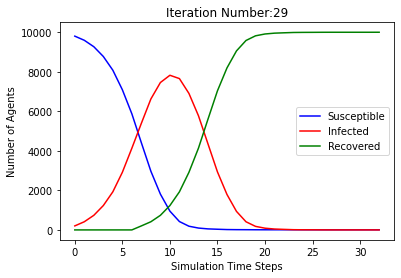

[9797, 9598, 9274, 8746, 8020, 7049, 5833, 4413, 3050, 1809, 932, 443, 198, 87, 46, 26, 22, 19, 16, 16, 14, 14, 14, 14, 14, 14, 14, 14]
[203, 402, 726, 1254, 1980, 2951, 4167, 5384, 6548, 7465, 7814, 7577, 6851, 5746, 4367, 3024, 1787, 913, 427, 182, 73, 32, 12, 8, 5, 2, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 402, 726, 1254, 1980, 2951, 4167, 5587, 6950, 8191, 9068, 9557, 9802, 9913, 9954, 9974, 9978, 9981, 9984, 9984, 9986]


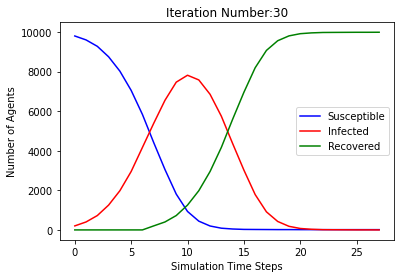

[9797, 9595, 9273, 8808, 8151, 7257, 6080, 4708, 3261, 1970, 1042, 493, 212, 101, 47, 24, 16, 12, 10, 8, 6, 6, 6, 5, 4, 4, 4, 4, 4, 4, 4, 4]
[203, 405, 727, 1192, 1849, 2743, 3920, 5089, 6334, 7303, 7766, 7658, 7045, 5979, 4661, 3237, 1954, 1030, 483, 204, 95, 41, 18, 11, 8, 6, 4, 2, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 405, 727, 1192, 1849, 2743, 3920, 5292, 6739, 8030, 8958, 9507, 9788, 9899, 9953, 9976, 9984, 9988, 9990, 9992, 9994, 9994, 9994, 9995, 9996]


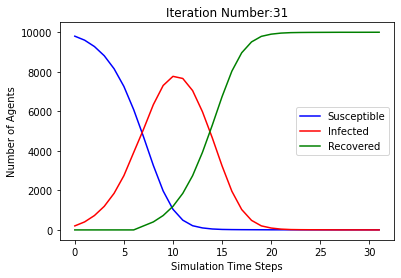

[9797, 9588, 9275, 8799, 8127, 7259, 6104, 4716, 3325, 2044, 1074, 522, 239, 100, 44, 23, 19, 16, 14, 14, 14, 14, 14, 14, 14, 14]
[203, 412, 725, 1201, 1873, 2741, 3896, 5081, 6263, 7231, 7725, 7605, 7020, 6004, 4672, 3302, 2025, 1058, 508, 225, 86, 30, 9, 5, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 412, 725, 1201, 1873, 2741, 3896, 5284, 6675, 7956, 8926, 9478, 9761, 9900, 9956, 9977, 9981, 9984, 9986]


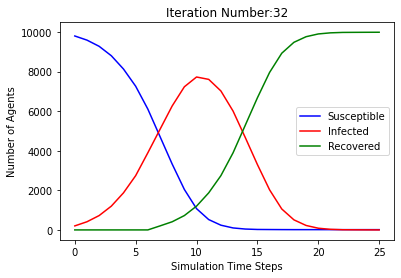

[9797, 9618, 9302, 8859, 8236, 7388, 6292, 4928, 3495, 2186, 1192, 607, 292, 131, 68, 41, 27, 23, 20, 20, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18]
[203, 382, 698, 1141, 1764, 2612, 3708, 4869, 6123, 7116, 7667, 7629, 7096, 6161, 4860, 3454, 2159, 1169, 587, 272, 112, 49, 23, 9, 5, 2, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 382, 698, 1141, 1764, 2612, 3708, 5072, 6505, 7814, 8808, 9393, 9708, 9869, 9932, 9959, 9973, 9977, 9980, 9980, 9981, 9981, 9982]


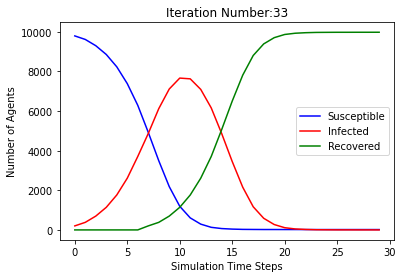

[9797, 9595, 9285, 8756, 8016, 7081, 5841, 4453, 2997, 1728, 878, 391, 166, 61, 31, 23, 18, 12, 12, 12, 10, 10, 10, 10, 10, 9, 8, 8, 8, 8, 8, 8, 8, 8]
[203, 405, 715, 1244, 1984, 2919, 4159, 5344, 6598, 7557, 7878, 7625, 6915, 5780, 4422, 2974, 1710, 866, 379, 154, 51, 21, 13, 8, 2, 3, 4, 2, 2, 2, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 405, 715, 1244, 1984, 2919, 4159, 5547, 7003, 8272, 9122, 9609, 9834, 9939, 9969, 9977, 9982, 9988, 9988, 9988, 9990, 9990, 9990, 9990, 9990, 9991, 9992]


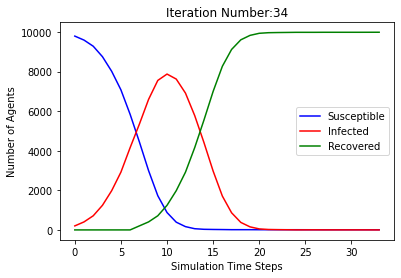

[9797, 9612, 9323, 8870, 8191, 7300, 6143, 4782, 3406, 2143, 1153, 543, 235, 95, 50, 23, 16, 12, 10, 10, 10, 10, 10, 10, 10, 10]
[203, 388, 677, 1130, 1809, 2700, 3857, 5015, 6206, 7180, 7717, 7648, 7065, 6048, 4732, 3383, 2127, 1141, 533, 225, 85, 40, 13, 6, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 388, 677, 1130, 1809, 2700, 3857, 5218, 6594, 7857, 8847, 9457, 9765, 9905, 9950, 9977, 9984, 9988, 9990]


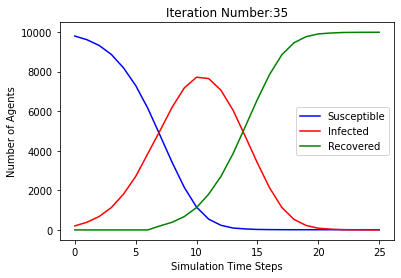

[9797, 9607, 9272, 8798, 8149, 7241, 6079, 4716, 3280, 2041, 1086, 491, 198, 66, 35, 22, 13, 10, 8, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5]
[203, 393, 728, 1202, 1851, 2759, 3921, 5081, 6327, 7231, 7712, 7658, 7043, 6013, 4681, 3258, 2028, 1076, 483, 191, 59, 28, 16, 8, 5, 3, 2, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 393, 728, 1202, 1851, 2759, 3921, 5284, 6720, 7959, 8914, 9509, 9802, 9934, 9965, 9978, 9987, 9990, 9992, 9993, 9993, 9993, 9994, 9995]


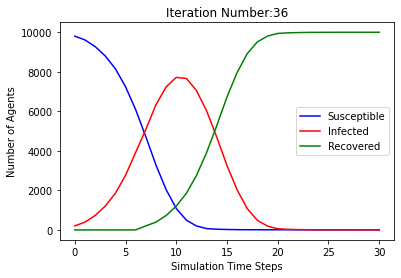

[9797, 9589, 9270, 8786, 8145, 7260, 6101, 4720, 3278, 2055, 1151, 532, 212, 97, 55, 30, 19, 14, 11, 10, 9, 9, 9, 9, 9, 9, 9, 9]
[203, 411, 730, 1214, 1855, 2740, 3899, 5077, 6311, 7215, 7635, 7613, 7048, 6004, 4665, 3248, 2036, 1137, 521, 202, 88, 46, 21, 10, 5, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 411, 730, 1214, 1855, 2740, 3899, 5280, 6722, 7945, 8849, 9468, 9788, 9903, 9945, 9970, 9981, 9986, 9989, 9990, 9991]


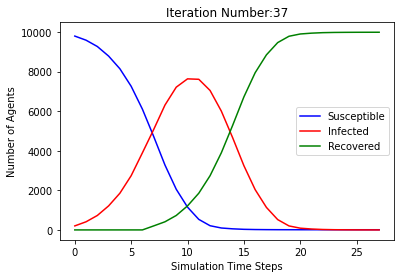

[9797, 9590, 9281, 8841, 8189, 7358, 6248, 4865, 3441, 2178, 1178, 545, 220, 87, 45, 25, 19, 17, 17, 16, 15, 15, 15, 15, 15, 15, 15, 15]
[203, 410, 719, 1159, 1811, 2642, 3752, 4932, 6149, 7103, 7663, 7644, 7138, 6161, 4820, 3416, 2159, 1161, 528, 204, 72, 30, 10, 4, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 410, 719, 1159, 1811, 2642, 3752, 5135, 6559, 7822, 8822, 9455, 9780, 9913, 9955, 9975, 9981, 9983, 9983, 9984, 9985]


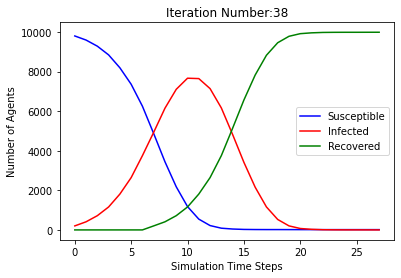

[9797, 9595, 9275, 8817, 8160, 7294, 6136, 4734, 3310, 2056, 1085, 499, 228, 98, 51, 23, 14, 9, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6]
[203, 405, 725, 1183, 1840, 2706, 3864, 5063, 6285, 7219, 7732, 7661, 7066, 6038, 4683, 3287, 2042, 1076, 491, 220, 92, 45, 17, 8, 3, 2, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 405, 725, 1183, 1840, 2706, 3864, 5266, 6690, 7944, 8915, 9501, 9772, 9902, 9949, 9977, 9986, 9991, 9992, 9992, 9994]


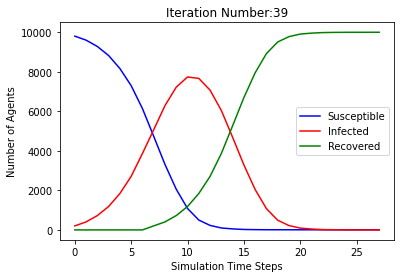

[9797, 9601, 9256, 8743, 7999, 7077, 5854, 4538, 3116, 1893, 1028, 507, 207, 71, 39, 19, 12, 10, 6, 6, 6, 5, 3, 3, 3, 3, 3, 3, 3, 3]
[203, 399, 744, 1257, 2001, 2923, 4146, 5259, 6485, 7363, 7715, 7492, 6870, 5783, 4499, 3097, 1881, 1018, 501, 201, 65, 34, 16, 9, 7, 3, 3, 3, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 399, 744, 1257, 2001, 2923, 4146, 5462, 6884, 8107, 8972, 9493, 9793, 9929, 9961, 9981, 9988, 9990, 9994, 9994, 9994, 9995, 9997]


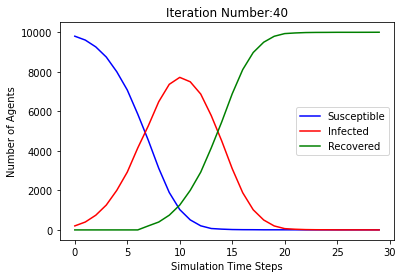

[9797, 9620, 9302, 8807, 8119, 7222, 6058, 4696, 3278, 2066, 1122, 557, 250, 136, 76, 47, 36, 23, 17, 15, 14, 13, 13, 13, 13, 13, 13, 13, 13]
[203, 380, 698, 1193, 1881, 2778, 3942, 5101, 6342, 7236, 7685, 7562, 6972, 5922, 4620, 3231, 2030, 1099, 540, 235, 122, 63, 34, 23, 10, 4, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 380, 698, 1193, 1881, 2778, 3942, 5304, 6722, 7934, 8878, 9443, 9750, 9864, 9924, 9953, 9964, 9977, 9983, 9985, 9986, 9987]


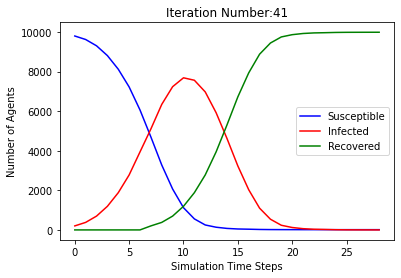

[9797, 9605, 9308, 8870, 8218, 7327, 6137, 4719, 3303, 2008, 1020, 473, 203, 102, 50, 24, 16, 14, 14, 14, 12, 11, 11, 11, 11, 11, 11, 11, 11]
[203, 395, 692, 1130, 1782, 2673, 3863, 5078, 6302, 7300, 7850, 7745, 7124, 6035, 4669, 3279, 1992, 1006, 459, 189, 90, 39, 13, 5, 3, 3, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 395, 692, 1130, 1782, 2673, 3863, 5281, 6697, 7992, 8980, 9527, 9797, 9898, 9950, 9976, 9984, 9986, 9986, 9986, 9988, 9989]


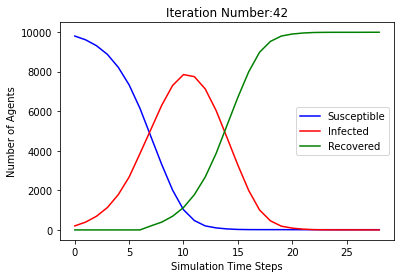

[9797, 9611, 9319, 8860, 8239, 7395, 6247, 4871, 3474, 2191, 1182, 586, 274, 118, 62, 38, 24, 21, 14, 13, 13, 13, 13, 13, 13, 13, 13]
[203, 389, 681, 1140, 1761, 2605, 3753, 4926, 6137, 7128, 7678, 7653, 7121, 6129, 4809, 3436, 2167, 1161, 572, 261, 105, 49, 25, 11, 8, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 389, 681, 1140, 1761, 2605, 3753, 5129, 6526, 7809, 8818, 9414, 9726, 9882, 9938, 9962, 9976, 9979, 9986, 9987]


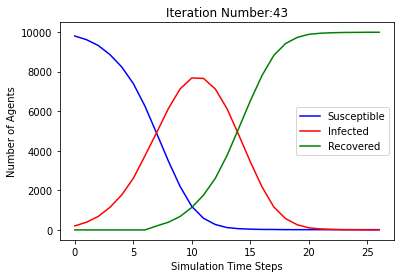

[9797, 9603, 9284, 8815, 8109, 7188, 6002, 4658, 3232, 1983, 1015, 467, 194, 81, 34, 19, 9, 8, 8, 7, 6, 6, 6, 6, 6, 6, 6, 6]
[203, 397, 716, 1185, 1891, 2812, 3998, 5139, 6371, 7301, 7800, 7642, 6994, 5921, 4624, 3213, 1974, 1007, 459, 187, 75, 28, 13, 3, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 397, 716, 1185, 1891, 2812, 3998, 5342, 6768, 8017, 8985, 9533, 9806, 9919, 9966, 9981, 9991, 9992, 9992, 9993, 9994]


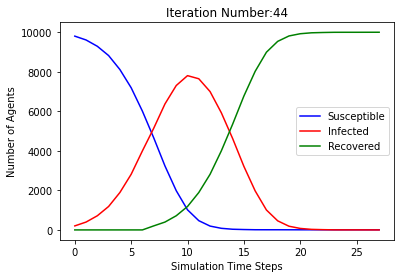

[9797, 9582, 9227, 8728, 8029, 7087, 5892, 4468, 3037, 1813, 961, 444, 179, 78, 36, 24, 17, 10, 10, 8, 8, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5]
[203, 418, 773, 1272, 1971, 2913, 4108, 5329, 6545, 7414, 7767, 7585, 6908, 5814, 4432, 3013, 1796, 951, 434, 171, 70, 29, 18, 12, 5, 5, 3, 3, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 418, 773, 1272, 1971, 2913, 4108, 5532, 6963, 8187, 9039, 9556, 9821, 9922, 9964, 9976, 9983, 9990, 9990, 9992, 9992, 9993, 9994, 9995]


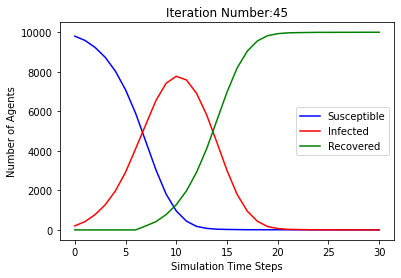

[9797, 9602, 9280, 8820, 8154, 7203, 6021, 4533, 3083, 1773, 903, 413, 185, 85, 42, 26, 15, 10, 7, 6, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4]
[203, 398, 720, 1180, 1846, 2797, 3979, 5264, 6519, 7507, 7917, 7741, 7018, 5936, 4491, 3057, 1758, 893, 406, 179, 80, 37, 22, 11, 6, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 398, 720, 1180, 1846, 2797, 3979, 5467, 6917, 8227, 9097, 9587, 9815, 9915, 9958, 9974, 9985, 9990, 9993, 9994, 9995, 9995, 9996]


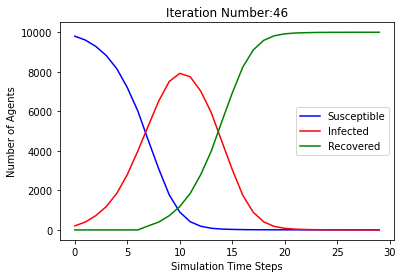

[9797, 9602, 9287, 8818, 8168, 7240, 6059, 4659, 3238, 1945, 971, 431, 197, 91, 45, 32, 21, 12, 9, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7]
[203, 398, 713, 1182, 1832, 2760, 3941, 5138, 6364, 7342, 7847, 7737, 7043, 5968, 4614, 3206, 1924, 959, 422, 189, 83, 37, 24, 14, 5, 2, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 398, 713, 1182, 1832, 2760, 3941, 5341, 6762, 8055, 9029, 9569, 9803, 9909, 9955, 9968, 9979, 9988, 9991, 9992, 9992, 9992, 9992, 9993]


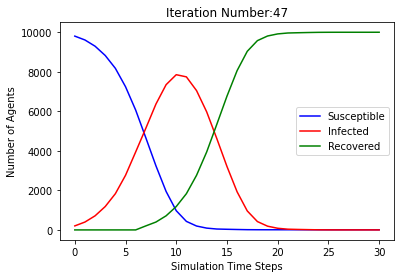

[9797, 9586, 9262, 8801, 8131, 7259, 6087, 4679, 3274, 1995, 1052, 471, 202, 89, 42, 27, 20, 15, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12]
[203, 414, 738, 1199, 1869, 2741, 3913, 5118, 6312, 7267, 7749, 7660, 7057, 5998, 4637, 3247, 1975, 1037, 458, 189, 76, 29, 14, 8, 3, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 414, 738, 1199, 1869, 2741, 3913, 5321, 6726, 8005, 8948, 9529, 9798, 9911, 9958, 9973, 9980, 9985, 9987, 9987, 9987, 9987, 9987, 9988]


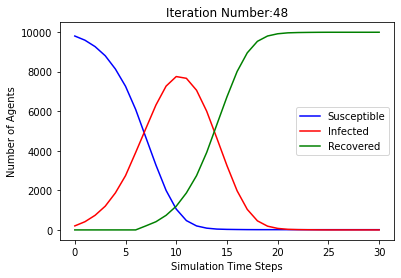

[9797, 9600, 9255, 8789, 8121, 7197, 6019, 4610, 3182, 1890, 1021, 515, 223, 95, 54, 35, 28, 22, 19, 19, 19, 19, 19, 19, 18, 17, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15]
[203, 400, 745, 1211, 1879, 2803, 3981, 5187, 6418, 7365, 7768, 7606, 6974, 5924, 4556, 3147, 1862, 999, 496, 204, 76, 35, 16, 9, 4, 2, 3, 3, 4, 4, 4, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 400, 745, 1211, 1879, 2803, 3981, 5390, 6818, 8110, 8979, 9485, 9777, 9905, 9946, 9965, 9972, 9978, 9981, 9981, 9981, 9981, 9981, 9981, 9982, 9983, 9984, 9984, 9985]


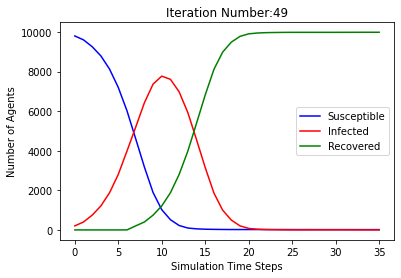

[9797, 9594, 9264, 8791, 8091, 7146, 5955, 4527, 3095, 1835, 964, 452, 180, 81, 35, 24, 19, 16, 12, 12, 12, 12, 12, 12, 12, 12]
[203, 406, 736, 1209, 1909, 2854, 4045, 5270, 6499, 7429, 7827, 7639, 6966, 5874, 4492, 3071, 1816, 948, 440, 168, 69, 23, 12, 7, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 406, 736, 1209, 1909, 2854, 4045, 5473, 6905, 8165, 9036, 9548, 9820, 9919, 9965, 9976, 9981, 9984, 9988]


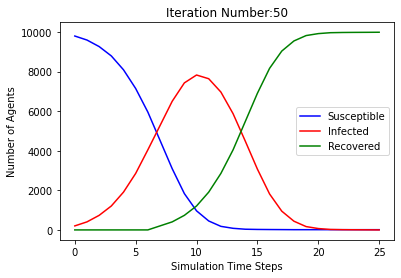

[9797, 9595, 9256, 8785, 8079, 7087, 5845, 4455, 3028, 1776, 935, 429, 191, 74, 42, 22, 16, 15, 14, 12, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9]
[203, 405, 744, 1215, 1921, 2913, 4155, 5342, 6567, 7480, 7850, 7650, 6896, 5771, 4413, 3006, 1760, 920, 415, 179, 64, 32, 12, 7, 6, 5, 3, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 405, 744, 1215, 1921, 2913, 4155, 5545, 6972, 8224, 9065, 9571, 9809, 9926, 9958, 9978, 9984, 9985, 9986, 9988, 9990, 9990, 9990, 9991]


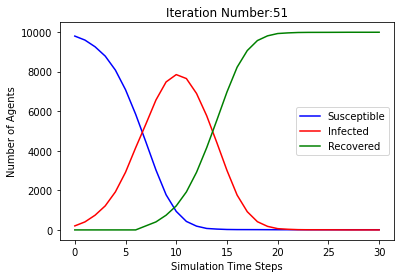

[9797, 9582, 9245, 8753, 8051, 7072, 5870, 4433, 3053, 1831, 963, 481, 214, 89, 42, 23, 17, 13, 10, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6]
[203, 418, 755, 1247, 1949, 2928, 4130, 5364, 6529, 7414, 7790, 7570, 6858, 5781, 4391, 3030, 1814, 950, 471, 207, 82, 36, 17, 11, 7, 4, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 418, 755, 1247, 1949, 2928, 4130, 5567, 6947, 8169, 9037, 9519, 9786, 9911, 9958, 9977, 9983, 9987, 9990, 9993, 9993, 9994]


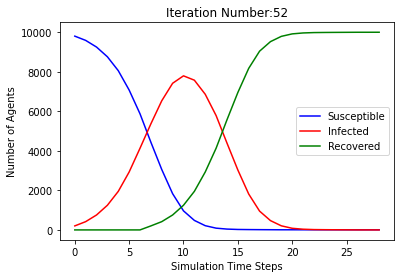

[9797, 9616, 9314, 8839, 8208, 7309, 6133, 4792, 3383, 2128, 1154, 570, 278, 125, 56, 29, 24, 19, 17, 16, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13]
[203, 384, 686, 1161, 1792, 2691, 3867, 5005, 6233, 7186, 7685, 7638, 7031, 6008, 4736, 3354, 2104, 1135, 553, 262, 111, 42, 16, 11, 6, 4, 3, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 384, 686, 1161, 1792, 2691, 3867, 5208, 6617, 7872, 8846, 9430, 9722, 9875, 9944, 9971, 9976, 9981, 9983, 9984, 9986, 9986, 9987]


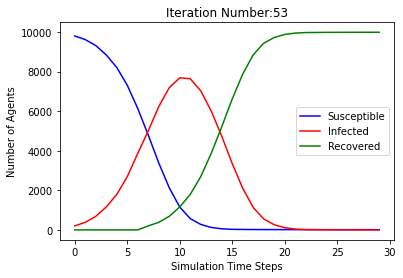

[9797, 9594, 9288, 8812, 8110, 7217, 6024, 4587, 3133, 1855, 935, 416, 185, 73, 37, 19, 10, 6, 5, 5, 5, 5, 5, 5, 5, 5]
[203, 406, 712, 1188, 1890, 2783, 3976, 5210, 6461, 7433, 7877, 7694, 7032, 5951, 4550, 3114, 1845, 929, 411, 180, 68, 32, 14, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 406, 712, 1188, 1890, 2783, 3976, 5413, 6867, 8145, 9065, 9584, 9815, 9927, 9963, 9981, 9990, 9994, 9995]


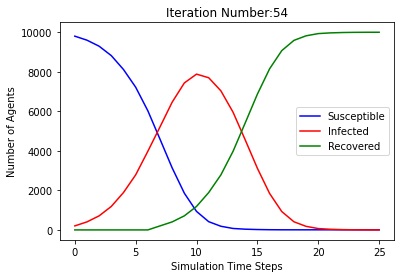

[9797, 9591, 9267, 8784, 8103, 7217, 6053, 4637, 3247, 1978, 1054, 481, 207, 91, 42, 24, 16, 11, 9, 7, 7, 7, 7, 7, 7, 7, 7]
[203, 409, 733, 1216, 1897, 2783, 3947, 5160, 6344, 7289, 7730, 7622, 7010, 5962, 4595, 3223, 1962, 1043, 472, 200, 84, 35, 17, 9, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 409, 733, 1216, 1897, 2783, 3947, 5363, 6753, 8022, 8946, 9519, 9793, 9909, 9958, 9976, 9984, 9989, 9991, 9993]


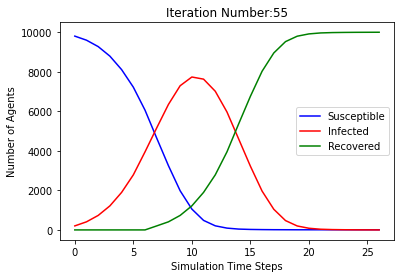

[9797, 9598, 9270, 8797, 8139, 7270, 6112, 4803, 3379, 2097, 1134, 596, 267, 102, 44, 27, 17, 16, 14, 13, 12, 12, 12, 12, 12, 12, 12, 12]
[203, 402, 730, 1203, 1861, 2730, 3888, 4994, 6219, 7173, 7663, 7543, 7003, 6010, 4759, 3352, 2080, 1118, 582, 254, 90, 32, 15, 5, 4, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 402, 730, 1203, 1861, 2730, 3888, 5197, 6621, 7903, 8866, 9404, 9733, 9898, 9956, 9973, 9983, 9984, 9986, 9987, 9988]


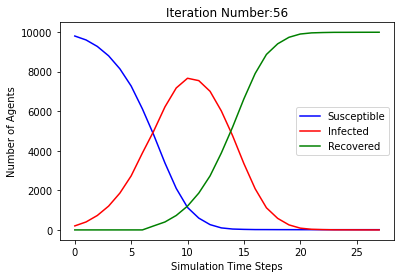

[9797, 9607, 9282, 8846, 8196, 7323, 6211, 4813, 3376, 2072, 1110, 547, 258, 118, 64, 29, 17, 13, 12, 11, 10, 9, 9, 9, 9, 9, 9, 9, 9]
[203, 393, 718, 1154, 1804, 2677, 3789, 4984, 6231, 7210, 7736, 7649, 7065, 6093, 4749, 3347, 2055, 1097, 535, 247, 108, 55, 20, 8, 4, 3, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 393, 718, 1154, 1804, 2677, 3789, 5187, 6624, 7928, 8890, 9453, 9742, 9882, 9936, 9971, 9983, 9987, 9988, 9989, 9990, 9991]


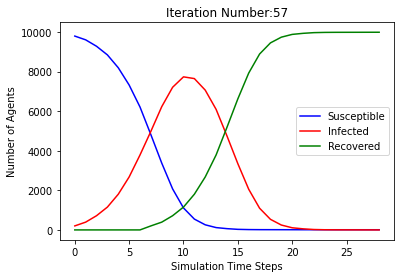

[9797, 9610, 9307, 8849, 8185, 7266, 6144, 4751, 3271, 2000, 1048, 476, 213, 98, 45, 25, 19, 14, 8, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6]
[203, 390, 693, 1151, 1815, 2734, 3856, 5046, 6339, 7307, 7801, 7709, 7053, 6046, 4706, 3246, 1981, 1034, 468, 206, 91, 38, 19, 13, 8, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 390, 693, 1151, 1815, 2734, 3856, 5249, 6729, 8000, 8952, 9524, 9787, 9902, 9955, 9975, 9981, 9986, 9992, 9993, 9993, 9993, 9994]


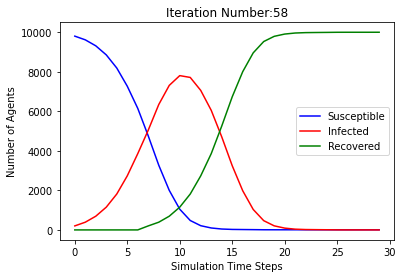

[9797, 9602, 9304, 8857, 8203, 7313, 6170, 4728, 3324, 2006, 1069, 515, 216, 91, 40, 23, 14, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3]
[203, 398, 696, 1143, 1797, 2687, 3830, 5069, 6278, 7298, 7788, 7688, 7097, 6079, 4688, 3301, 1992, 1064, 511, 212, 87, 36, 19, 10, 2, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 398, 696, 1143, 1797, 2687, 3830, 5272, 6676, 7994, 8931, 9485, 9784, 9909, 9960, 9977, 9986, 9995, 9996, 9996, 9996, 9996, 9996, 9996, 9997]


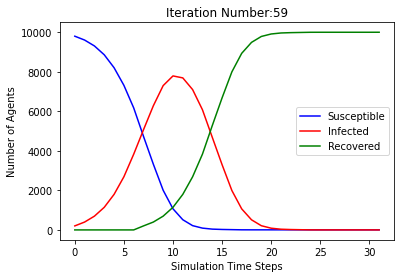

[9797, 9581, 9273, 8818, 8170, 7262, 6109, 4728, 3321, 2061, 1138, 521, 228, 96, 42, 13, 6, 3, 2, 2, 2, 2, 2, 2, 2, 2]
[203, 419, 727, 1182, 1830, 2738, 3891, 5069, 6260, 7212, 7680, 7649, 7034, 6013, 4686, 3308, 2055, 1135, 519, 226, 94, 40, 11, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 419, 727, 1182, 1830, 2738, 3891, 5272, 6679, 7939, 8862, 9479, 9772, 9904, 9958, 9987, 9994, 9997, 9998]


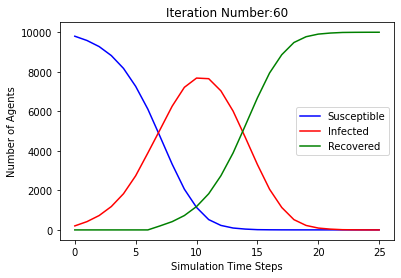

[9797, 9610, 9298, 8850, 8216, 7262, 6108, 4760, 3288, 2026, 1101, 502, 212, 85, 45, 23, 12, 10, 10, 10, 7, 7, 7, 7, 7, 7, 7, 7]
[203, 390, 702, 1150, 1784, 2738, 3892, 5037, 6322, 7272, 7749, 7714, 7050, 6023, 4715, 3265, 2014, 1091, 492, 202, 78, 38, 16, 5, 3, 3, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 390, 702, 1150, 1784, 2738, 3892, 5240, 6712, 7974, 8899, 9498, 9788, 9915, 9955, 9977, 9988, 9990, 9990, 9990, 9993]


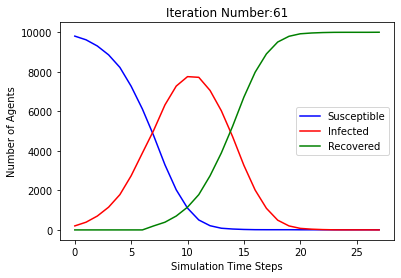

[9797, 9582, 9249, 8763, 8072, 7132, 5905, 4515, 3124, 1911, 1056, 518, 237, 107, 47, 25, 19, 12, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10]
[203, 418, 751, 1237, 1928, 2868, 4095, 5282, 6458, 7338, 7707, 7554, 6895, 5798, 4468, 3099, 1892, 1044, 507, 226, 97, 37, 15, 9, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 418, 751, 1237, 1928, 2868, 4095, 5485, 6876, 8089, 8944, 9482, 9763, 9893, 9953, 9975, 9981, 9988, 9989, 9989, 9990]


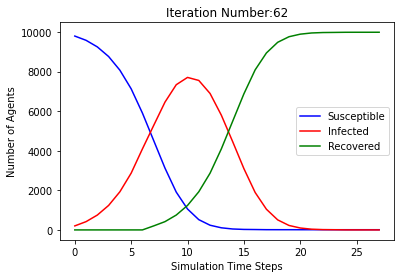

[9797, 9610, 9293, 8815, 8195, 7322, 6306, 4973, 3554, 2224, 1179, 547, 252, 118, 51, 29, 22, 17, 13, 10, 10, 10, 10, 10, 10, 10, 10]
[203, 390, 707, 1185, 1805, 2678, 3694, 4824, 6056, 7069, 7636, 7648, 7070, 6188, 4922, 3525, 2202, 1162, 534, 242, 108, 41, 19, 12, 7, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 390, 707, 1185, 1805, 2678, 3694, 5027, 6446, 7776, 8821, 9453, 9748, 9882, 9949, 9971, 9978, 9983, 9987, 9990]


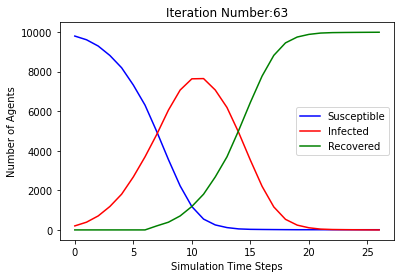

[9797, 9603, 9293, 8829, 8141, 7212, 6078, 4714, 3299, 2025, 1081, 466, 186, 81, 37, 20, 10, 6, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3]
[203, 397, 707, 1171, 1859, 2788, 3922, 5083, 6304, 7268, 7748, 7675, 7026, 5997, 4677, 3279, 2015, 1075, 462, 182, 78, 34, 17, 7, 3, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 397, 707, 1171, 1859, 2788, 3922, 5286, 6701, 7975, 8919, 9534, 9814, 9919, 9963, 9980, 9990, 9994, 9996, 9996, 9997]


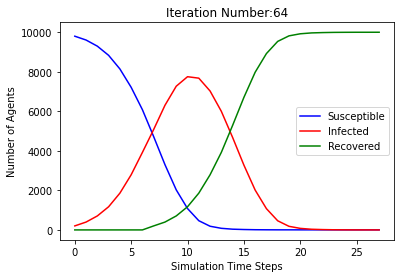

[9797, 9627, 9331, 8890, 8238, 7325, 6156, 4746, 3284, 1993, 1060, 524, 224, 100, 47, 28, 21, 13, 13, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10]
[203, 373, 669, 1110, 1762, 2675, 3844, 5051, 6343, 7338, 7830, 7714, 7101, 6056, 4699, 3256, 1972, 1047, 511, 213, 89, 37, 18, 11, 3, 3, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 373, 669, 1110, 1762, 2675, 3844, 5254, 6716, 8007, 8940, 9476, 9776, 9900, 9953, 9972, 9979, 9987, 9987, 9989, 9989, 9990]


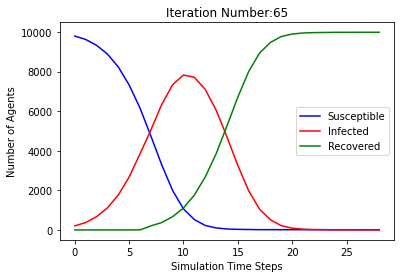

[9797, 9587, 9256, 8783, 8091, 7207, 6028, 4686, 3323, 2049, 1143, 532, 215, 95, 43, 22, 16, 15, 12, 10, 9, 9, 9, 9, 9, 9, 9, 9]
[203, 413, 744, 1217, 1909, 2793, 3972, 5111, 6264, 7207, 7640, 7559, 6992, 5933, 4643, 3301, 2033, 1128, 520, 205, 86, 34, 13, 7, 6, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 413, 744, 1217, 1909, 2793, 3972, 5314, 6677, 7951, 8857, 9468, 9785, 9905, 9957, 9978, 9984, 9985, 9988, 9990, 9991]


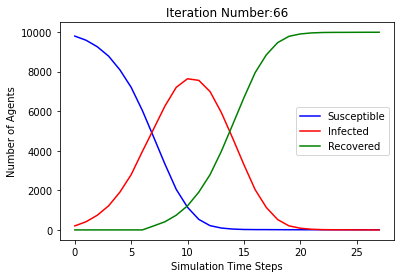

[9797, 9582, 9245, 8737, 8010, 7093, 5868, 4457, 3049, 1828, 971, 472, 202, 92, 50, 26, 16, 11, 11, 10, 9, 9, 9, 9, 9, 9, 9, 9]
[203, 418, 755, 1263, 1990, 2907, 4132, 5340, 6533, 7417, 7766, 7538, 6891, 5776, 4407, 3023, 1812, 960, 461, 192, 83, 41, 17, 7, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 418, 755, 1263, 1990, 2907, 4132, 5543, 6951, 8172, 9029, 9528, 9798, 9908, 9950, 9974, 9984, 9989, 9989, 9990, 9991]


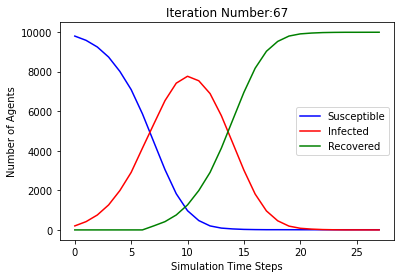

[9797, 9599, 9263, 8779, 8135, 7200, 5994, 4633, 3255, 1908, 984, 447, 188, 79, 38, 26, 22, 19, 16, 16, 16, 15, 14, 14, 14, 14, 14, 14, 14, 14]
[203, 401, 737, 1221, 1865, 2800, 4006, 5164, 6344, 7355, 7795, 7688, 7012, 5915, 4595, 3229, 1886, 965, 431, 172, 63, 23, 12, 8, 5, 2, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 401, 737, 1221, 1865, 2800, 4006, 5367, 6745, 8092, 9016, 9553, 9812, 9921, 9962, 9974, 9978, 9981, 9984, 9984, 9984, 9985, 9986]


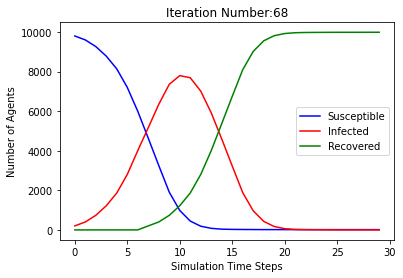

[9797, 9598, 9299, 8859, 8241, 7351, 6184, 4743, 3351, 2074, 1128, 531, 239, 99, 40, 21, 11, 9, 9, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6]
[203, 402, 701, 1141, 1759, 2649, 3816, 5054, 6247, 7225, 7731, 7710, 7112, 6085, 4703, 3330, 2063, 1119, 522, 232, 92, 34, 15, 5, 3, 3, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 402, 701, 1141, 1759, 2649, 3816, 5257, 6649, 7926, 8872, 9469, 9761, 9901, 9960, 9979, 9989, 9991, 9991, 9993, 9993, 9994]


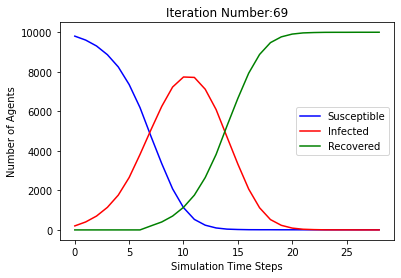

[9797, 9617, 9300, 8837, 8190, 7281, 6114, 4712, 3309, 1998, 1099, 532, 227, 116, 49, 34, 25, 17, 12, 11, 10, 9, 8, 8, 8, 8, 8, 8, 8, 8]
[203, 383, 700, 1163, 1810, 2719, 3886, 5085, 6308, 7302, 7738, 7658, 7054, 5998, 4663, 3275, 1973, 1082, 520, 216, 106, 40, 26, 17, 9, 4, 3, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 383, 700, 1163, 1810, 2719, 3886, 5288, 6691, 8002, 8901, 9468, 9773, 9884, 9951, 9966, 9975, 9983, 9988, 9989, 9990, 9991, 9992]


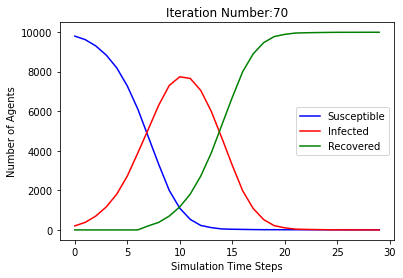

[9797, 9599, 9275, 8815, 8196, 7280, 6065, 4660, 3233, 1991, 1028, 496, 213, 86, 43, 24, 16, 11, 10, 10, 10, 10, 10, 10, 10, 10]
[203, 401, 725, 1185, 1804, 2720, 3935, 5137, 6366, 7284, 7787, 7700, 7067, 5979, 4617, 3209, 1975, 1017, 486, 203, 76, 33, 14, 6, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 401, 725, 1185, 1804, 2720, 3935, 5340, 6767, 8009, 8972, 9504, 9787, 9914, 9957, 9976, 9984, 9989, 9990]


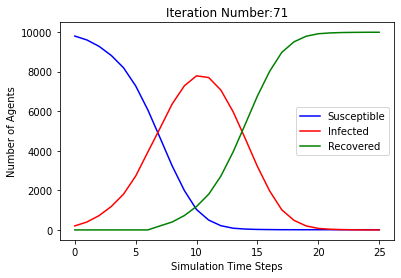

[9797, 9576, 9239, 8714, 8039, 7115, 5843, 4425, 2948, 1722, 852, 380, 168, 68, 33, 22, 14, 13, 9, 8, 8, 8, 8, 8, 8, 8, 8]
[203, 424, 761, 1286, 1961, 2885, 4157, 5372, 6628, 7517, 7862, 7659, 6947, 5775, 4392, 2926, 1708, 839, 371, 160, 60, 25, 14, 6, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 424, 761, 1286, 1961, 2885, 4157, 5575, 7052, 8278, 9148, 9620, 9832, 9932, 9967, 9978, 9986, 9987, 9991, 9992]


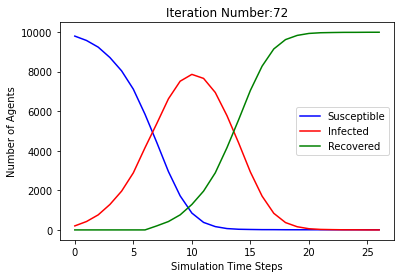

[9797, 9607, 9318, 8828, 8170, 7290, 6160, 4813, 3414, 2113, 1141, 567, 241, 103, 40, 27, 18, 15, 13, 10, 10, 10, 10, 10, 10, 10, 10]
[203, 393, 682, 1172, 1830, 2710, 3840, 4984, 6193, 7205, 7687, 7603, 7049, 6057, 4773, 3387, 2095, 1126, 554, 231, 93, 30, 17, 8, 5, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 393, 682, 1172, 1830, 2710, 3840, 5187, 6586, 7887, 8859, 9433, 9759, 9897, 9960, 9973, 9982, 9985, 9987, 9990]


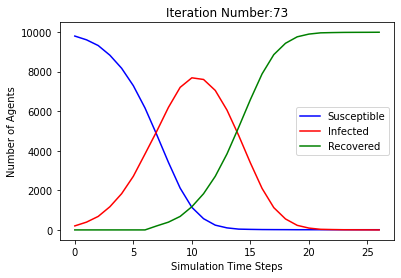

[9797, 9607, 9272, 8767, 8093, 7106, 5872, 4385, 2911, 1668, 788, 347, 138, 71, 33, 17, 8, 7, 6, 6, 6, 6, 6, 6, 6, 6]
[203, 393, 728, 1233, 1907, 2894, 4128, 5412, 6696, 7604, 7979, 7746, 6968, 5801, 4352, 2894, 1660, 781, 341, 132, 65, 27, 11, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 393, 728, 1233, 1907, 2894, 4128, 5615, 7089, 8332, 9212, 9653, 9862, 9929, 9967, 9983, 9992, 9993, 9994]


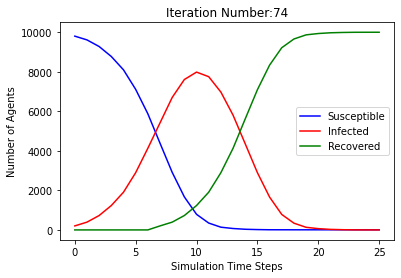

[9797, 9617, 9276, 8810, 8114, 7198, 6038, 4626, 3134, 1862, 977, 415, 170, 73, 36, 17, 11, 9, 5, 3, 3, 3, 3, 3, 3, 3, 3]
[203, 383, 724, 1190, 1886, 2802, 3962, 5171, 6483, 7414, 7833, 7699, 7028, 5965, 4590, 3117, 1851, 968, 410, 167, 70, 33, 14, 8, 6, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 383, 724, 1190, 1886, 2802, 3962, 5374, 6866, 8138, 9023, 9585, 9830, 9927, 9964, 9983, 9989, 9991, 9995, 9997]


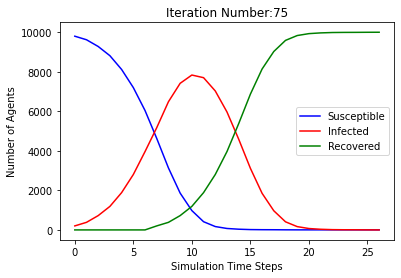

[9797, 9600, 9286, 8850, 8218, 7403, 6289, 4938, 3554, 2208, 1196, 601, 290, 142, 81, 45, 28, 21, 18, 13, 13, 10, 10, 10, 10, 10, 10, 10, 10]
[203, 400, 714, 1150, 1782, 2597, 3711, 4859, 6046, 7078, 7654, 7617, 7113, 6147, 4857, 3509, 2180, 1175, 583, 277, 129, 71, 35, 18, 11, 8, 3, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 400, 714, 1150, 1782, 2597, 3711, 5062, 6446, 7792, 8804, 9399, 9710, 9858, 9919, 9955, 9972, 9979, 9982, 9987, 9987, 9990]


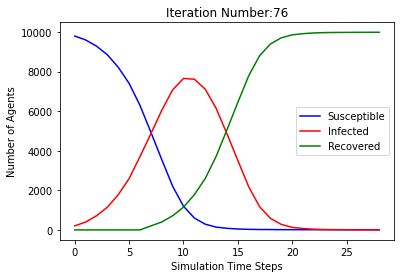

[9797, 9599, 9294, 8838, 8172, 7319, 6109, 4642, 3222, 1946, 1009, 506, 236, 100, 53, 26, 14, 9, 8, 8, 8, 8, 8, 8, 8, 8]
[203, 401, 706, 1162, 1828, 2681, 3891, 5155, 6377, 7348, 7829, 7666, 7083, 6009, 4589, 3196, 1932, 1000, 498, 228, 92, 45, 18, 6, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 401, 706, 1162, 1828, 2681, 3891, 5358, 6778, 8054, 8991, 9494, 9764, 9900, 9947, 9974, 9986, 9991, 9992]


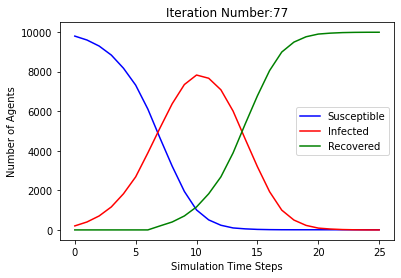

[9797, 9588, 9274, 8791, 8115, 7182, 5983, 4545, 3035, 1754, 888, 401, 169, 75, 36, 23, 20, 16, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11]
[203, 412, 726, 1209, 1885, 2818, 4017, 5252, 6553, 7520, 7903, 7714, 7013, 5908, 4509, 3012, 1734, 872, 389, 157, 64, 25, 12, 9, 5, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 412, 726, 1209, 1885, 2818, 4017, 5455, 6965, 8246, 9112, 9599, 9831, 9925, 9964, 9977, 9980, 9984, 9988, 9988, 9989]


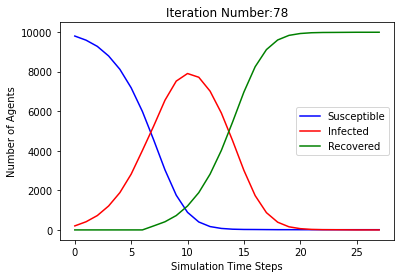

[9797, 9584, 9280, 8780, 8147, 7226, 6044, 4710, 3315, 2119, 1192, 601, 255, 110, 62, 31, 21, 11, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9]
[203, 416, 720, 1220, 1853, 2774, 3956, 5087, 6269, 7161, 7588, 7546, 6971, 5934, 4648, 3284, 2098, 1181, 591, 245, 100, 53, 22, 12, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 416, 720, 1220, 1853, 2774, 3956, 5290, 6685, 7881, 8808, 9399, 9745, 9890, 9938, 9969, 9979, 9989, 9990, 9990, 9990, 9991]


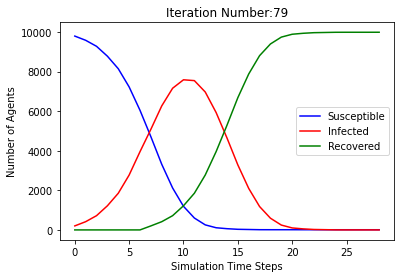

[9797, 9599, 9279, 8825, 8211, 7286, 6109, 4753, 3400, 2144, 1154, 557, 262, 142, 74, 48, 33, 22, 15, 12, 10, 9, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7]
[203, 401, 721, 1175, 1789, 2714, 3891, 5044, 6199, 7135, 7671, 7654, 7024, 5967, 4679, 3352, 2111, 1132, 542, 250, 132, 65, 40, 25, 15, 8, 5, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 401, 721, 1175, 1789, 2714, 3891, 5247, 6600, 7856, 8846, 9443, 9738, 9858, 9926, 9952, 9967, 9978, 9985, 9988, 9990, 9991, 9992, 9992, 9993]


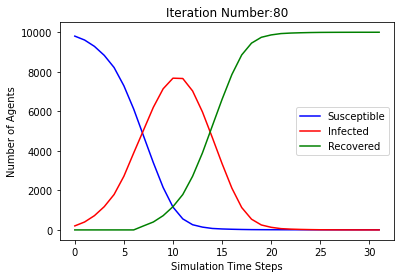

[9797, 9611, 9325, 8875, 8251, 7412, 6279, 4914, 3529, 2203, 1223, 583, 251, 127, 63, 34, 21, 16, 14, 14, 14, 13, 12, 12, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10]
[203, 389, 675, 1125, 1749, 2588, 3721, 4883, 6082, 7122, 7652, 7668, 7161, 6152, 4851, 3495, 2182, 1207, 569, 237, 113, 50, 22, 9, 5, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 389, 675, 1125, 1749, 2588, 3721, 5086, 6471, 7797, 8777, 9417, 9749, 9873, 9937, 9966, 9979, 9984, 9986, 9986, 9986, 9987, 9988, 9988, 9989, 9989, 9989, 9989, 9989, 9990]


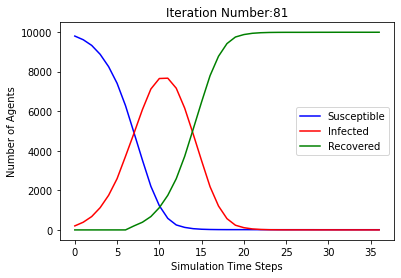

[9797, 9595, 9229, 8710, 8038, 7137, 5937, 4524, 3136, 1854, 956, 419, 186, 88, 35, 18, 12, 9, 8, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5]
[203, 405, 771, 1290, 1962, 2863, 4063, 5273, 6459, 7375, 7754, 7619, 6951, 5849, 4489, 3118, 1842, 947, 411, 179, 82, 29, 12, 7, 4, 3, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 405, 771, 1290, 1962, 2863, 4063, 5476, 6864, 8146, 9044, 9581, 9814, 9912, 9965, 9982, 9988, 9991, 9992, 9993, 9994, 9994, 9994, 9995]


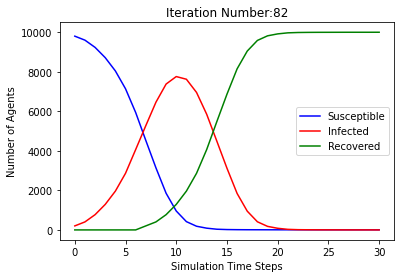

[9797, 9588, 9271, 8768, 8061, 7128, 5945, 4554, 3095, 1915, 1004, 497, 226, 106, 49, 34, 21, 12, 11, 11, 11, 11, 11, 11, 11, 11]
[203, 412, 729, 1232, 1939, 2872, 4055, 5243, 6493, 7356, 7764, 7564, 6902, 5839, 4505, 3061, 1894, 992, 486, 215, 95, 38, 23, 10, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 412, 729, 1232, 1939, 2872, 4055, 5446, 6905, 8085, 8996, 9503, 9774, 9894, 9951, 9966, 9979, 9988, 9989]


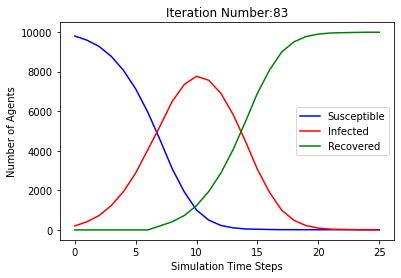

[9797, 9585, 9242, 8802, 8146, 7275, 6096, 4724, 3367, 2080, 1118, 518, 223, 93, 37, 25, 20, 13, 11, 10, 10, 10, 8, 8, 8, 8, 8, 8, 8, 8]
[203, 415, 758, 1198, 1854, 2725, 3904, 5073, 6218, 7162, 7684, 7628, 7052, 6003, 4687, 3342, 2060, 1105, 507, 213, 83, 27, 17, 12, 5, 3, 2, 2, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 415, 758, 1198, 1854, 2725, 3904, 5276, 6633, 7920, 8882, 9482, 9777, 9907, 9963, 9975, 9980, 9987, 9989, 9990, 9990, 9990, 9992]


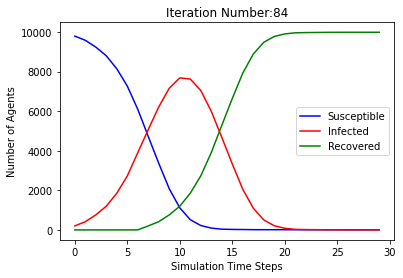

[9797, 9612, 9313, 8857, 8242, 7372, 6165, 4817, 3385, 2129, 1120, 517, 215, 102, 53, 30, 19, 12, 11, 11, 11, 11, 11, 11, 11, 11]
[203, 388, 687, 1143, 1758, 2628, 3835, 4980, 6227, 7184, 7737, 7725, 7157, 6063, 4764, 3355, 2110, 1108, 506, 204, 91, 42, 19, 8, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 388, 687, 1143, 1758, 2628, 3835, 5183, 6615, 7871, 8880, 9483, 9785, 9898, 9947, 9970, 9981, 9988, 9989]


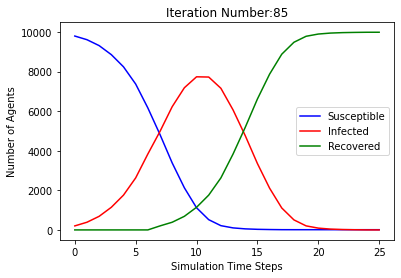

[9797, 9582, 9232, 8763, 8032, 7091, 5856, 4425, 2999, 1787, 947, 431, 175, 64, 25, 13, 9, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5]
[203, 418, 768, 1237, 1968, 2909, 4144, 5372, 6583, 7445, 7816, 7601, 6916, 5792, 4400, 2986, 1778, 940, 424, 169, 58, 19, 7, 3, 2, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 418, 768, 1237, 1968, 2909, 4144, 5575, 7001, 8213, 9053, 9569, 9825, 9936, 9975, 9987, 9991, 9993, 9993, 9994, 9994, 9994, 9994, 9994, 9995]


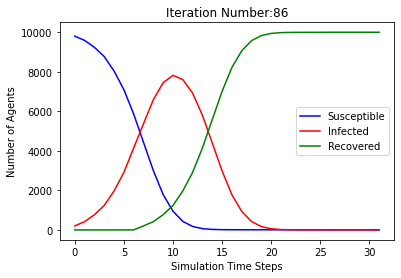

[9797, 9608, 9288, 8819, 8123, 7186, 6011, 4683, 3284, 2004, 1052, 489, 201, 98, 48, 26, 18, 13, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11]
[203, 392, 712, 1181, 1877, 2814, 3989, 5114, 6324, 7284, 7767, 7634, 6985, 5913, 4635, 3258, 1986, 1039, 477, 189, 86, 37, 15, 7, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 392, 712, 1181, 1877, 2814, 3989, 5317, 6716, 7996, 8948, 9511, 9799, 9902, 9952, 9974, 9982, 9987, 9988, 9988, 9988, 9989]


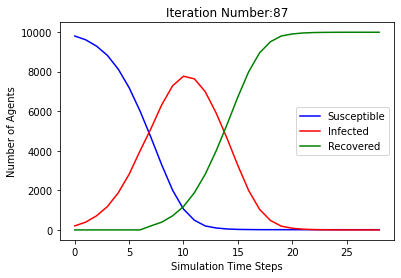

[9797, 9625, 9332, 8928, 8325, 7508, 6373, 5064, 3705, 2364, 1329, 638, 291, 116, 52, 30, 21, 14, 13, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9]
[203, 375, 668, 1072, 1675, 2492, 3627, 4733, 5920, 6968, 7599, 7687, 7217, 6257, 5012, 3675, 2343, 1315, 625, 281, 106, 42, 20, 12, 5, 4, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 375, 668, 1072, 1675, 2492, 3627, 4936, 6295, 7636, 8671, 9362, 9709, 9884, 9948, 9970, 9979, 9986, 9987, 9990, 9990, 9990, 9990, 9991]


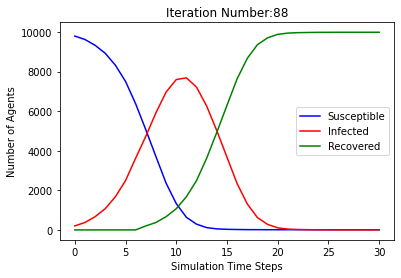

[9797, 9588, 9274, 8825, 8161, 7315, 6140, 4798, 3373, 2093, 1137, 551, 259, 136, 65, 38, 24, 17, 15, 12, 12, 12, 12, 12, 12, 12, 12]
[203, 412, 726, 1175, 1839, 2685, 3860, 4999, 6215, 7181, 7688, 7610, 7056, 6004, 4733, 3335, 2069, 1120, 536, 247, 124, 53, 26, 12, 5, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 412, 726, 1175, 1839, 2685, 3860, 5202, 6627, 7907, 8863, 9449, 9741, 9864, 9935, 9962, 9976, 9983, 9985, 9988]


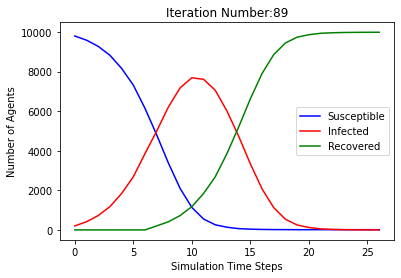

[9797, 9589, 9289, 8803, 8139, 7208, 6031, 4630, 3234, 1948, 1035, 519, 243, 107, 52, 28, 21, 14, 14, 13, 11, 11, 10, 10, 8, 7, 7, 7, 7, 7, 7, 7, 7]
[203, 411, 711, 1197, 1861, 2792, 3969, 5167, 6355, 7341, 7768, 7620, 6965, 5924, 4578, 3206, 1927, 1021, 505, 230, 96, 41, 18, 11, 6, 7, 6, 4, 4, 3, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 411, 711, 1197, 1861, 2792, 3969, 5370, 6766, 8052, 8965, 9481, 9757, 9893, 9948, 9972, 9979, 9986, 9986, 9987, 9989, 9989, 9990, 9990, 9992, 9993]


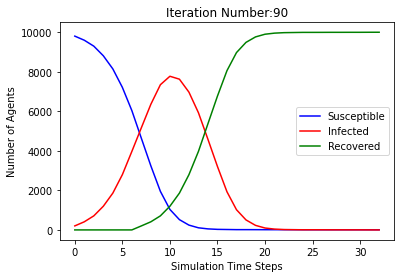

[9797, 9572, 9234, 8731, 8054, 7134, 5972, 4565, 3117, 1835, 958, 447, 193, 94, 44, 25, 17, 15, 15, 14, 12, 11, 11, 11, 11, 11, 11, 11, 11]
[203, 428, 766, 1269, 1946, 2866, 4028, 5232, 6455, 7399, 7773, 7607, 6941, 5878, 4521, 3092, 1818, 943, 432, 179, 82, 33, 14, 6, 4, 4, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 428, 766, 1269, 1946, 2866, 4028, 5435, 6883, 8165, 9042, 9553, 9807, 9906, 9956, 9975, 9983, 9985, 9985, 9986, 9988, 9989]


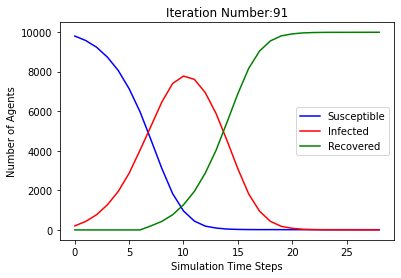

[9797, 9619, 9315, 8862, 8215, 7368, 6208, 4811, 3376, 2112, 1142, 519, 218, 87, 43, 29, 16, 15, 13, 13, 13, 13, 13, 13, 13, 13]
[203, 381, 685, 1138, 1785, 2632, 3792, 4986, 6243, 7203, 7720, 7696, 7150, 6121, 4768, 3347, 2096, 1127, 506, 205, 74, 30, 16, 3, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 381, 685, 1138, 1785, 2632, 3792, 5189, 6624, 7888, 8858, 9481, 9782, 9913, 9957, 9971, 9984, 9985, 9987]


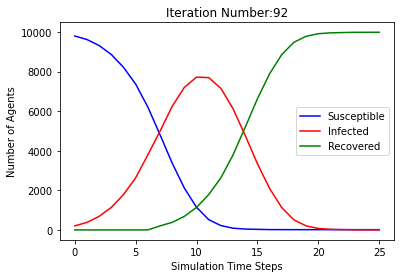

[9797, 9593, 9271, 8809, 8114, 7126, 5922, 4534, 3130, 1911, 1007, 467, 199, 95, 42, 30, 20, 12, 9, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7]
[203, 407, 729, 1191, 1886, 2874, 4078, 5263, 6463, 7360, 7802, 7647, 6927, 5827, 4492, 3100, 1891, 995, 458, 191, 87, 35, 23, 13, 5, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 407, 729, 1191, 1886, 2874, 4078, 5466, 6870, 8089, 8993, 9533, 9801, 9905, 9958, 9970, 9980, 9988, 9991, 9992, 9992, 9993]


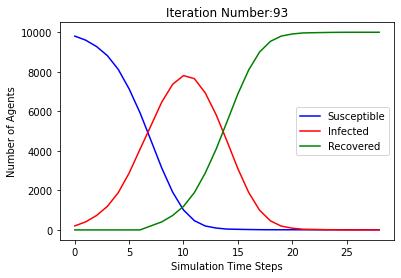

[9797, 9610, 9295, 8832, 8183, 7283, 6076, 4638, 3215, 1986, 1074, 512, 253, 117, 45, 25, 18, 14, 12, 10, 9, 8, 8, 8, 8, 8, 8, 8, 8]
[203, 390, 705, 1168, 1817, 2717, 3924, 5159, 6395, 7309, 7758, 7671, 7030, 5959, 4593, 3190, 1968, 1060, 500, 243, 108, 37, 17, 10, 6, 4, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 390, 705, 1168, 1817, 2717, 3924, 5362, 6785, 8014, 8926, 9488, 9747, 9883, 9955, 9975, 9982, 9986, 9988, 9990, 9991, 9992]


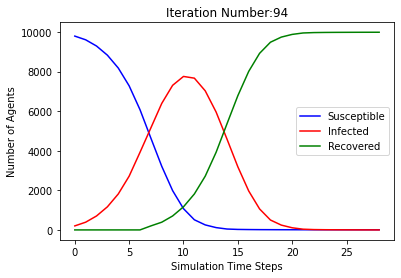

[9797, 9581, 9232, 8726, 8052, 7136, 5929, 4572, 3178, 1935, 980, 430, 182, 79, 45, 27, 15, 11, 11, 11, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8]
[203, 419, 768, 1274, 1948, 2864, 4071, 5225, 6403, 7297, 7746, 7622, 6954, 5850, 4527, 3151, 1920, 969, 419, 171, 70, 36, 19, 7, 3, 3, 3, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 419, 768, 1274, 1948, 2864, 4071, 5428, 6822, 8065, 9020, 9570, 9818, 9921, 9955, 9973, 9985, 9989, 9989, 9989, 9991, 9991, 9992]


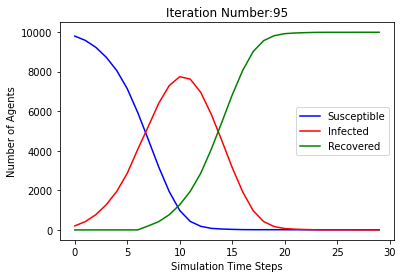

[9797, 9601, 9280, 8807, 8129, 7153, 5996, 4556, 3160, 1885, 957, 485, 208, 96, 46, 23, 13, 9, 7, 6, 6, 6, 6, 6, 6, 6, 6]
[203, 399, 720, 1193, 1871, 2847, 4004, 5241, 6441, 7395, 7850, 7644, 6945, 5900, 4510, 3137, 1872, 948, 478, 202, 90, 40, 17, 7, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 399, 720, 1193, 1871, 2847, 4004, 5444, 6840, 8115, 9043, 9515, 9792, 9904, 9954, 9977, 9987, 9991, 9993, 9994]


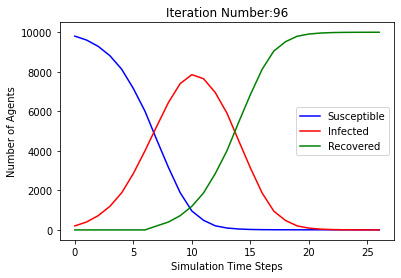

[9797, 9585, 9257, 8741, 8023, 7071, 5861, 4489, 3123, 1870, 954, 418, 181, 69, 25, 14, 8, 6, 5, 5, 5, 5, 5, 5, 5, 5]
[203, 415, 743, 1259, 1977, 2929, 4139, 5308, 6462, 7387, 7787, 7605, 6890, 5792, 4464, 3109, 1862, 948, 413, 176, 64, 20, 9, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 415, 743, 1259, 1977, 2929, 4139, 5511, 6877, 8130, 9046, 9582, 9819, 9931, 9975, 9986, 9992, 9994, 9995]


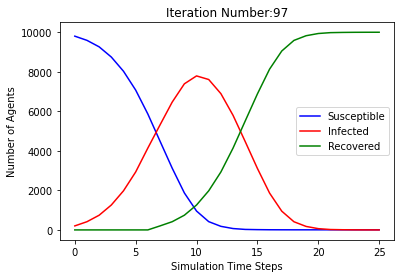

[9797, 9599, 9310, 8860, 8223, 7347, 6217, 4915, 3482, 2163, 1170, 575, 279, 132, 68, 38, 23, 18, 15, 12, 11, 11, 11, 11, 11, 11, 11, 11]
[203, 401, 690, 1140, 1777, 2653, 3783, 4882, 6117, 7147, 7690, 7648, 7068, 6085, 4847, 3444, 2140, 1152, 560, 267, 121, 57, 27, 12, 7, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 401, 690, 1140, 1777, 2653, 3783, 5085, 6518, 7837, 8830, 9425, 9721, 9868, 9932, 9962, 9977, 9982, 9985, 9988, 9989]


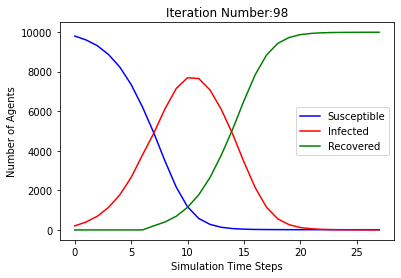

[9797, 9602, 9296, 8817, 8157, 7224, 6053, 4629, 3181, 1826, 905, 402, 175, 77, 29, 18, 11, 8, 6, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3]
[203, 398, 704, 1183, 1843, 2776, 3947, 5168, 6421, 7470, 7912, 7755, 7049, 5976, 4600, 3163, 1815, 897, 396, 170, 73, 25, 14, 8, 5, 3, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 398, 704, 1183, 1843, 2776, 3947, 5371, 6819, 8174, 9095, 9598, 9825, 9923, 9971, 9982, 9989, 9992, 9994, 9995, 9996, 9996, 9996, 9997]


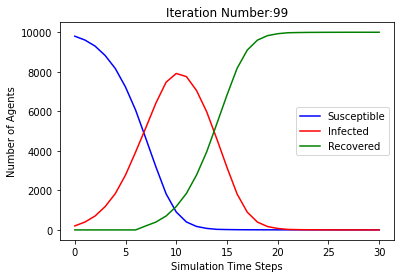

[9797, 9596, 9280, 8839, 8164, 7250, 6116, 4726, 3235, 1936, 970, 409, 135, 42, 16, 10, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5]
[203, 404, 720, 1161, 1836, 2750, 3884, 5071, 6361, 7344, 7869, 7755, 7115, 6074, 4710, 3225, 1929, 964, 404, 130, 37, 11, 5, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 203, 404, 720, 1161, 1836, 2750, 3884, 5274, 6765, 8064, 9030, 9591, 9865, 9958, 9984, 9990, 9993, 9994, 9995]


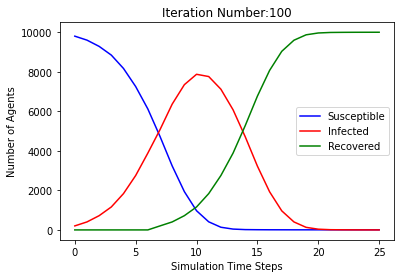

In [13]:
from numpy import zeros, linspace
Node_p=Node.copy()
Node_n=Node.copy() 
Agent_p=Agent.copy()
Agent_n=Agent.copy()
#print(Node_p)
#print(Agent_p)
S,I,R = Count_SIR_Node(Node_n) 
#S1,I1,R1 = Count_SIR_Agent(Agent_n)
#print([S,I,R]) 
#print([S1,I1,R1])

for i in range(100):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,T = [],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  T.append(j)

  while Ij > 0 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    #count=0
    #for i in range(len(Node_p)):
    #  count+=len(Node_p[i]) - 4
    #print(count)
    Sj,Ij,Rj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    T.append(j)
    #S1,I1,R1 = Count_SIR_Agent(Agent_n)
    #print("Simulation No:",i+1, "Iteration No: ", j)
    #print(Node_n)
    #print(Agent_n)
    #print([Sj,Ij,Rj]) 
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    #print([S1,I1,R1])
  print(S)
  print(I)
  print(R)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
  plt.show()    